## Graphing Training Progress

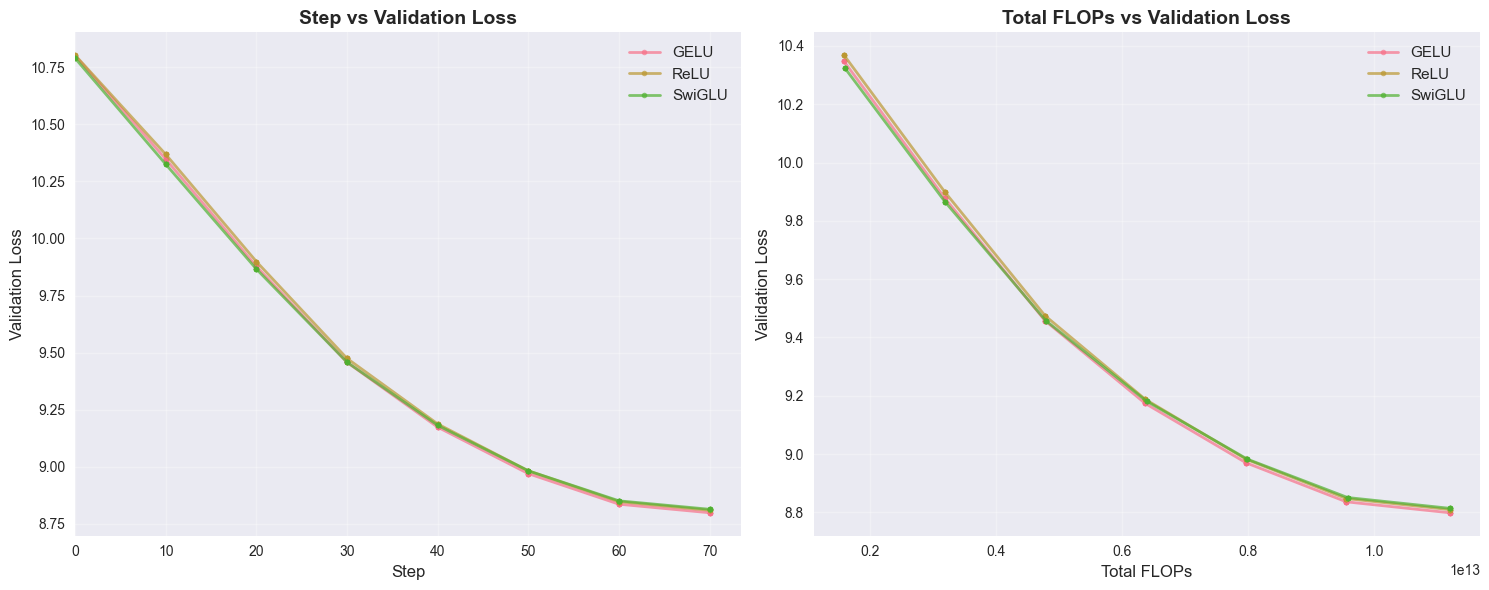


Summary Statistics:
GELU:
  Final validation loss: 8.7987
  Best validation loss: 8.7987
  Total FLOPs at end: 1.12e+13

ReLU:
  Final validation loss: 8.8096
  Best validation loss: 8.8096
  Total FLOPs at end: 1.12e+13

SwiGLU:
  Final validation loss: 8.8140
  Best validation loss: 8.8140
  Total FLOPs at end: 1.12e+13



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Read the data files
gelu_data = pd.read_csv('../experimental_data_folder/Activation_Functions_Comparison/GELU.csv')
relu_data = pd.read_csv('../experimental_data_folder/Activation_Functions_Comparison/ReLU.csv')
swiglu_data = pd.read_csv('../experimental_data_folder/Activation_Functions_Comparison/SwiGLU.csv')

# Add activation function labels
gelu_data['activation'] = 'GELU'
relu_data['activation'] = 'ReLU'
swiglu_data['activation'] = 'SwiGLU'

# Combine all data
all_data = pd.concat([gelu_data, relu_data, swiglu_data], ignore_index=True)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Step vs Validation Loss
for activation in ['GELU', 'ReLU', 'SwiGLU']:
    data = all_data[all_data['activation'] == activation]
    ax1.plot(data['step'], data['validation_loss'], 
             marker='o', markersize=4, alpha=0.7, linewidth=2, label=activation)

ax1.set_xlabel('Step', fontsize=12)
ax1.set_ylabel('Validation Loss', fontsize=12)
ax1.set_title('Step vs Validation Loss', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(left=0)

# Plot 2: Total FLOPs vs Validation Loss
for activation in ['GELU', 'ReLU', 'SwiGLU']:
    data = all_data[all_data['activation'] == activation]
    # Filter out zero FLOPs for better visualization
    non_zero_data = data[data['total_flops_profiler'] > 0]
    ax2.plot(non_zero_data['total_flops_profiler'], non_zero_data['validation_loss'], 
             marker='o', markersize=4, alpha=0.7, linewidth=2, label=activation)

ax2.set_xlabel('Total FLOPs', fontsize=12)
ax2.set_ylabel('Validation Loss', fontsize=12)
ax2.set_title('Total FLOPs vs Validation Loss', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# Adjust layout
plt.tight_layout()

# Save the plot
# plt.savefig('activation_functions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("=" * 50)
for activation in ['GELU', 'ReLU', 'SwiGLU']:
    data = all_data[all_data['activation'] == activation]
    final_val_loss = data['validation_loss'].iloc[-1]
    min_val_loss = data['validation_loss'].min()
    print(f"{activation}:")
    print(f"  Final validation loss: {final_val_loss:.4f}")
    print(f"  Best validation loss: {min_val_loss:.4f}")
    print(f"  Total FLOPs at end: {data['total_flops_profiler'].iloc[-1]:.2e}")
    print()